In [1]:
import sys 
sys.path.append('../..')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mstats

In [3]:
PDSI = pd.read_excel('../../input/Minusinsk-PDSI_SPEI-MJJAS.xlsx', sheet_name='PDSI_prev')
SPEI = pd.read_excel('../../input/Minusinsk-PDSI_SPEI-MJJAS.xlsx', sheet_name='SPEI_prev')

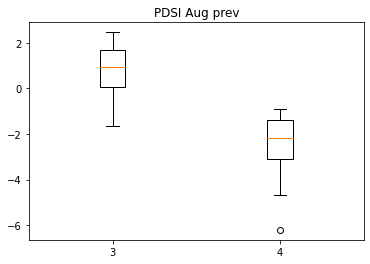

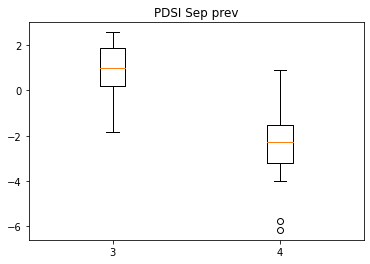

In [7]:
c1 = PDSI[PDSI['Class']==1]
c2 = PDSI[PDSI['Class']==2]
c3 = PDSI[PDSI['Class']==3]
c4 = PDSI[PDSI['Class']==4]

with open('../../output/PDSI_monthly.csv', 'w') as ouf:
    ouf.write('Month,Stat,PValue\n')
    for column in ['Aug', 'Sep']:
        #kruskalwallis = mstats.kruskalwallis(list(c1[column].dropna()), list(c2[column].dropna()), list(c3[column].dropna()), list(c4[column].dropna()))
        try:
            kruskalwallis = mstats.kruskalwallis(list(c3[column].dropna()), list(c4[column].dropna()))
            ouf.write(f"{column} prev,{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
            if kruskalwallis.pvalue < 0.05:
                #print(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}")
                #plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
                plt.boxplot([c3[column].dropna(), c4[column].dropna()], labels=['3', '4'])
                plt.title("PDSI "+ column + ' prev')
                plt.show()
        except:
            ouf.write(f"{column},,\n")

In [8]:
c1 = SPEI[SPEI['Class']==1]
c2 = SPEI[SPEI['Class']==2]
c3 = SPEI[SPEI['Class']==3]
c4 = SPEI[SPEI['Class']==4]

with open('../../output/SPEI_monthly.csv', 'w') as ouf:
    ouf.write('Month,Stat,PValue\n')
    for column in ['Aug', 'Sep']:
        #kruskalwallis = mstats.kruskalwallis(list(c1[column].dropna()), list(c2[column].dropna()), list(c3[column].dropna()), list(c4[column].dropna()))
        try:
            kruskalwallis = mstats.kruskalwallis(list(c3[column].dropna()), list(c4[column].dropna()))
            ouf.write(f"{column} prev,{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
            if kruskalwallis.pvalue < 0.05:
                #print(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}")
                #plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
                plt.boxplot([c3[column].dropna(), c4[column].dropna()], labels=['3', '4'])
                plt.title("SPEI "+ column + ' prev')
                plt.show()
        except:
            ouf.write(f"{column},,\n")

In [9]:
pd.read_csv('../../output/PDSI_monthly.csv').to_excel('../../output/PDSI_monthly.xlsx', index=False)
pd.read_csv('../../output/SPEI_monthly.csv').to_excel('../../output/SPEI_monthly.xlsx', index=False)